In [1]:
pip install elapid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.9 MB/s eta 0:00:00


In [2]:
pip install rasterio

In [3]:
pip install geopandas

In [4]:
# Import the Necessary Library Packages

import elapid as ela # Species Distribution Modeling Tools
import os # To Load the Datasets/Files from the Specified Directory
import warnings # To Ignore all the Warning Messages
import numpy as np # To Load the Numerical Python Values (Arrays)
import pandas as pd # To Load the Dataframe of the given Dataset/File
import geopandas as gpd #for Geospatial Data, specifically Vector Data and other formats such as shapefiles, GeoJSON & Geopackage files
import rasterio as rio # Reading, Writing, and Manipulating Raster Geospatial Data
import rasterio.plot as rioplot # To Visualize Raster Data
from sklearn import metrics # For Evaluation Metrics (To assess the performance)
import matplotlib as mpl # For Data Visualization
import matplotlib.pyplot as plt # For Data Visualization
from rasterio.plot import show # To Display the raster data using the show function
import ipywidgets as widgets # To use HTML Interactive Widgets
from IPython.display import display # To Control the output display of objects
import re # For Patterns, i.e., used to match and manipulate strings
from osgeo import gdal
import random
from matplotlib.colors import ListedColormap
# PLot Preferences
mpl.style.use('ggplot')

# Ignore the Warning Messages
warnings.filterwarnings("ignore")

# Define the color for barplots
pair_colors = ['#FFCC02', '#00458C']

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
Crop_path='/content/drive/MyDrive/Project_2/Insect Pest/tif files/Agriculture_crop_Tiff_files/Florida/clipped.TIF'

In [7]:
# Load the CSV file containing class labels
class_labels_df = pd.read_csv('/content/drive/MyDrive/Project_2/Insect Pest/tif files/Agriculture_crop_Tiff_files/AgricultureCrop_Florida.csv')
class_labels_df.head()

,OID_,Value,Count,Class_Name
0,NaN,1,421511.0,Corn
1,NaN,2,680264.0,Cotton
2,NaN,4,8097.0,Sorghum
3,NaN,5,106300.0,Soybeans
4,NaN,6,82.0,Sunflower


In [8]:
# Create a dictionary to map pixel values to class labels
value_to_class = dict(zip(class_labels_df['Value'], class_labels_df['Class_Name']))
value_to_class

{1: 'Corn',
 2: 'Cotton',
 4: 'Sorghum',
 5: 'Soybeans',
 6: 'Sunflower',
 10: 'Peanuts',
 11: 'Tobacco',
 12: 'Sweet Corn',
 21: 'Barley',
 24: 'Winter Wheat',
 26: 'Dbl Crop WinWht/Soybeans',
 27: 'Rye',
 28: 'Oats',
 29: 'Millet',
 37: 'Other Hay/Non Alfalfa',
 42: 'Dry Beans',
 43: 'Potatoes',
 44: 'Other Crops',
 45: 'Sugarcane',
 46: 'Sweet Potatoes',
 47: 'Misc Vegs & Fruits',
 48: 'Watermelons',
 50: 'Cucumbers',
 53: 'Peas',
 54: 'Tomatoes',
 58: 'Clover/Wildflowers',
 59: 'Sod/Grass Seed',
 61: 'Fallow/Idle Cropland',
 67: 'Peaches',
 69: 'Grapes',
 71: 'Other Tree Crops',
 72: 'Citrus',
 74: 'Pecans',
 92: 'Aquaculture',
 111: 'Open Water',
 121: 'Developed/Open Space',
 122: 'Developed/Low Intensity',
 123: 'Developed/Med Intensity',
 124: 'Developed/High Intensity',
 131: 'Barren',
 141: 'Deciduous Forest',
 142: 'Evergreen Forest',
 143: 'Mixed Forest',
 152: 'Shrubland',
 176: 'Grassland/Pasture',
 190: 'Woody Wetlands',
 195: 'Herbaceous Wetlands',
 205: 'Triticale',
 2

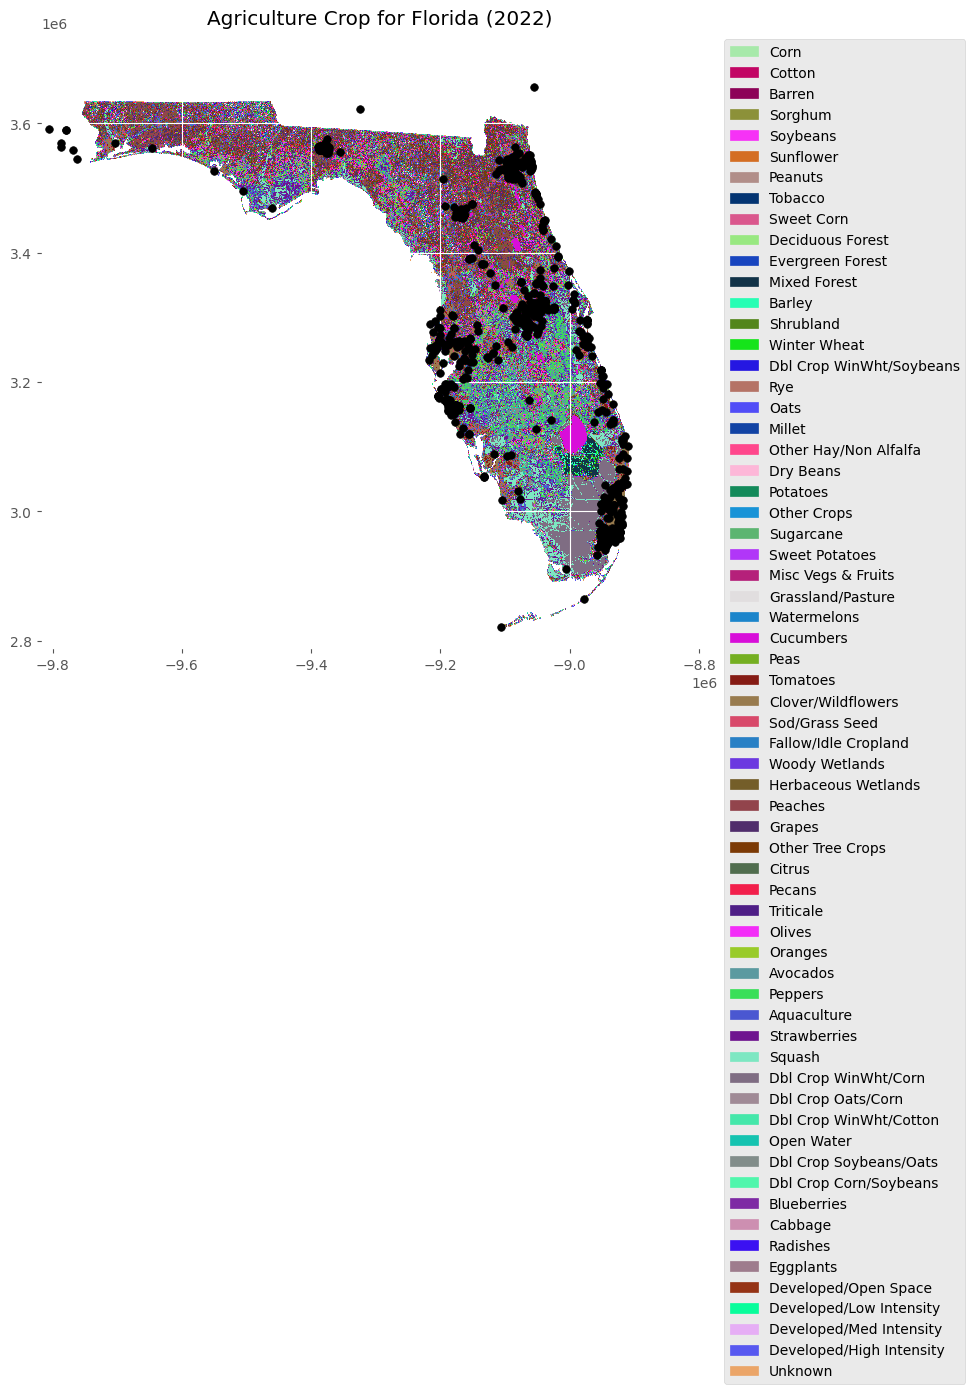

In [9]:
# Open the TIFF file
with rio.open('/content/drive/MyDrive/Project_2/Insect Pest/tif files/Agriculture_crop_Tiff_files/Florida/clipped.TIF') as src:
    # Read the TIFF file as a numpy array
    tiff_array = src.read(1)  # Assuming it's a single band TIFF, change the index if it's a multiband TIFF

    # Get unique pixel values from the TIFF array
    unique_values = list(set(tiff_array.flatten()))

    # Generate random colors for each unique class label
    class_colors = [f'#{random.randint(0x000000, 0xFFFFFF):06x}' for _ in range(len(unique_values))]

    # Add a white color for regions outside the map (where class labels are not present)
    class_colors.append('#FFFFFF')

    # Create a custom colormap based on the generated class colors
    colormap = ListedColormap(class_colors, len(unique_values) + 1)  # Add 1 for the white background

    # Load the species data points
    species_data = gpd.read_file('/content/drive/MyDrive/Project_2/Insect Pest/Species Data/GBIF Site/Diaprepes_abbreviatus(2012-2023).gpkg')

    # Transform the CRS of the species data to match the CRS of the TIFF file
    species_data = species_data.to_crs("EPSG:3857")
    # Filter the species data to include only points within the extent of the TIFF background
    species_data = species_data.cx[src.bounds[0]:src.bounds[2], src.bounds[1]:src.bounds[3]]

    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(15, 8))

    # Plot the TIFF array with the colormap
    img = ax.imshow(tiff_array, cmap=colormap, vmin=unique_values[0], vmax=unique_values[-1], extent=[src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top])

    # Plot species data on top of the TIFF plot
    species_data.plot(ax=ax, markersize=30, color='Black', label='Species Data')

    # Set the title of the plot
    ax.set_title('Agriculture Crop for Florida (2022)')

    # Create a custom legend with class labels and colors
    legend_elements = [plt.Rectangle((0, 0), 1, 1, color=class_colors[i]) for i in range(len(unique_values))]
    class_labels_legend = [value_to_class.get(val, "Unknown") for val in unique_values]

    # Plot the legend outside of the map using bbox_to_anchor
    plt.legend(legend_elements, class_labels_legend, loc='upper left', bbox_to_anchor=(1, 1))


    # Plot the legend
#    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

    # Show the plot
    plt.show()


In [10]:
Crop_path='/content/drive/MyDrive/Project_2/Insect Pest/tif files/Agriculture_crop_Tiff_files/Florida/clipped.TIF'

In [11]:
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
import elapid as ela

# Define the function to transform the species data CRS
def transform_species_data_crs(species_data, target_crs):
    species_df = gpd.read_file(species_data)
    species_df = species_df.to_crs(target_crs)
    return species_df

In [12]:
# Define the rasters and vector paths
rasters = ['//content/drive/MyDrive/Project_2/Insect Pest/tif files/Agriculture_crop_Tiff_files/Florida/clipped.TIF']
vector = '/content/drive/MyDrive/Project_2/Insect Pest/Species Data/GBIF Site/BrownStinkBug(2007-2023).gpkg'

# Transform the species data to match the CRS of the TIFF file
target_crs = 'EPSG:3857'  # CRS of the TIFF file
presence_transformed = transform_species_data_crs(vector, target_crs)

In [13]:
# Read the presence data and draw background point samples
presence = presence_transformed
presence.head()
#Create a random geographic sample of points based on a raster's extent.
background = ela.sample_raster(Crop_path, count=10_000)
background.head()

0    POINT (-9048670.071 3126617.462)
1    POINT (-9072700.071 3286097.462)
2    POINT (-9482710.071 3625067.462)
3    POINT (-9032770.071 3425807.462)
4    POINT (-9032440.071 3417407.462)
dtype: geometry

In [14]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()
#Read raster values for each point in a vector and append as new column
annotated = ela.annotate(merged, Crop_path, drop_na=True, quiet=True)
annotated.head()


,geometry,class,b1
0,POINT (-9172982.967 3225137.474),1,190
1,POINT (-9171112.354 3455127.820),1,123
2,POINT (-9143235.171 3127689.499),1,122
3,POINT (-9668622.424 3552885.053),1,131
4,POINT (-9102702.074 3057422.059),1,123


In [15]:
# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [16]:
# Evaluate training performance
ypred = model.predict(x)
auc1 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc1:0.3f}")

# Write the model predictions to disk
output_raster = 'Florida_Prediction1.tif'
ela.apply_model_to_rasters(model, rasters, output_raster, quiet=True)



Training AUC score: 0.788


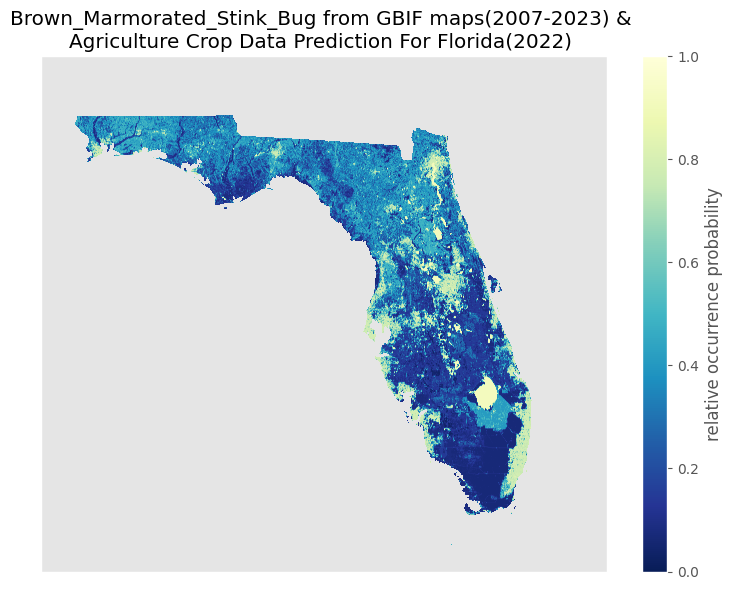

In [17]:
# Read the prediction raster into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Brown_Marmorated_Stink_Bug from GBIF maps(2007-2023) & \nAgriculture Crop Data Prediction For Florida(2022) ')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()
plt.show()